In [72]:
import xarray as xr
import gfdl_utils as gu
import matplotlib.pyplot as plt
import glob

In [99]:
def calc_asc113E(config):
    if config=='ESM4':
        configname = 'ESM4/piControl'
        timestr = '0101-0270'
        timeslice = slice('0121-07-02','0220-07-02')
    elif config=='CM4':
        configname = 'piControl_output'
        timestr = '0251-0405'
        timeslice = slice('0281-07-02','0380-07-02')

    rootdir = '/net2/Rebecca.Beadling/southern_ocean_fafmip/'+configname+'/'
    filename = 'ocean_annual_z.'+timestr+'.umo.nc'
    select = {
        'time':timeslice,
        'yh':slice(-65.5,-62),
        'z_l':slice(500,7000)
             }
    lon = -246.7
    umo = (xr.open_dataset(rootdir+filename,
                         drop_variables=['average_DT', 'average_T1', 'average_T2'],
                         use_cftime=True)['umo']
           .sel(**select)
           .sel(xq=lon,method='nearest')
          )
    return umo

In [100]:
umo_esm4 = calc_asc113E('ESM4')
umo_cm4 = calc_asc113E('CM4')

In [101]:
umo_esm4_sum = umo_esm4.sum(['yh','z_l'])/(1035*1e6)
umo_cm4_sum = umo_cm4.sum(['yh','z_l'])/(1035*1e6)

In [102]:
print('ESM4')
print('mean : '+str(umo_esm4_sum.mean('time').values)+' Sv')
print('std : '+str(umo_esm4_sum.std('time').values)+' Sv')
print(' ')
print('CM4')
print('mean : '+str(umo_cm4_sum.mean('time').values)+' Sv')
print('std : '+str(umo_cm4_sum.std('time').values)+' Sv')

ESM4
mean : -12.63861 Sv
std : 2.8879087 Sv
 
CM4
mean : -6.1958227 Sv
std : 3.144678 Sv


Text(0.5, 0, 'model year')

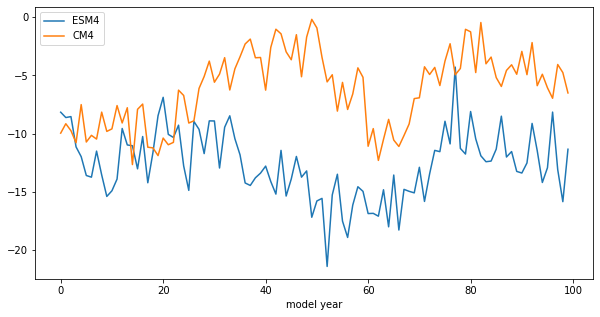

In [108]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(umo_esm4_sum,label='ESM4')
ax.plot(umo_cm4_sum,label='CM4')
ax.legend()
ax.set_xlabel('model year')

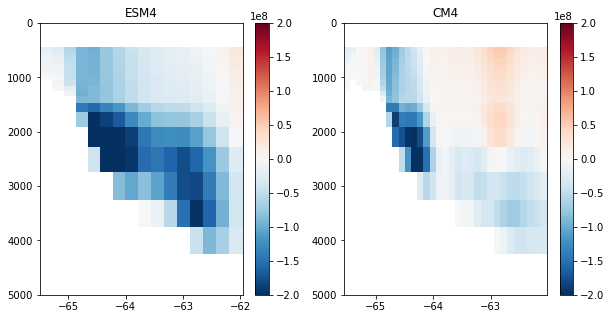

In [107]:
plt_kwargs = {'cmap':'RdBu_r','shading':'auto',
             'vmin':-2e8,'vmax':2e8}
ylims = [5000,0]

fig,(ax1,ax2)=plt.subplots(figsize=(10,5),ncols=2)

im = ax1.pcolormesh(umo_esm4['yh'],
                    umo_esm4['z_l'],
                    umo_esm4.mean('time'),
                    **plt_kwargs)
plt.colorbar(im,ax=ax1)
ax1.set_ylim(ylims)
ax1.set_title('ESM4')

im = ax2.pcolormesh(umo_cm4['yh'],
                    umo_cm4['z_l'],
                    umo_cm4.mean('time'),
                    **plt_kwargs)
plt.colorbar(im,ax=ax2)
ax2.set_ylim(ylims)
ax2.set_title('CM4');